<a href="https://colab.research.google.com/github/prakashveluru/FeatureEngineering/blob/master/FeatureEngineering_Day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_html('https://github.com/prakashveluru/FeatureEngineering/blob/master/train.csv')
df = pd.DataFrame(df[0])
df=df.iloc[:,1:]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Arbitrary Value Imputation
This technique was derived from kaggle competition 

It consists of replacing NAN by an arbitrary value



In [ ]:
df=df[['Age','Fare','Survived']]
df.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [ ]:
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)

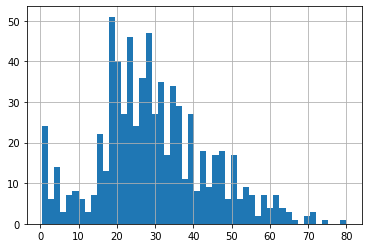

In [ ]:
df['Age'].hist(bins=50)

#Advantages¶
1.Easy to implement
2.Captures the importance of missingess if there is one
#Disadvantages
1.Distorts the original distribution of the variable

2.If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution

3.Hard to decide which value to use

# How To Handle Categroical Missing Values

Frequent Category Imputation

In [1]:
from google.colab import files
uploaded = files.upload()

import io
import pandas as pd
import numpy as np
df1 = pd.read_csv(io.BytesIO(uploaded['HousePrediction.csv']))

Saving HousePrediction.csv to HousePrediction.csv


In [2]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df1.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df =df1[['BsmtQual','FireplaceQu','GarageType','SalePrice']]
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [5]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [6]:
df.isnull().mean().round(2).sort_values(ascending=True)

SalePrice      0.00
BsmtQual       0.03
GarageType     0.06
FireplaceQu    0.47
dtype: float64

In [ ]:
df.shape

(1460, 4)

Compute the frequency with every feature

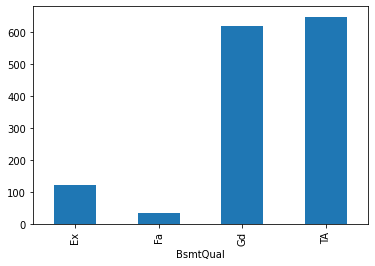

In [ ]:
df.groupby(['BsmtQual'])['BsmtQual'].count().plot.bar()

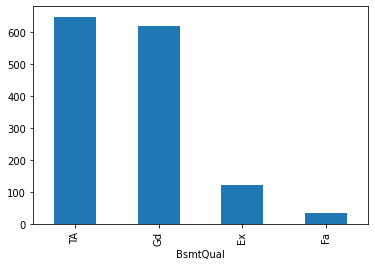

In [ ]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

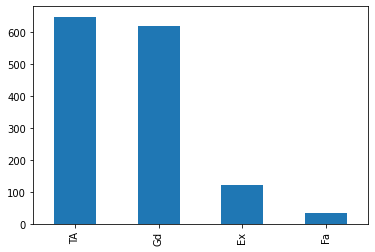

In [ ]:
df['BsmtQual'].value_counts().plot.bar()

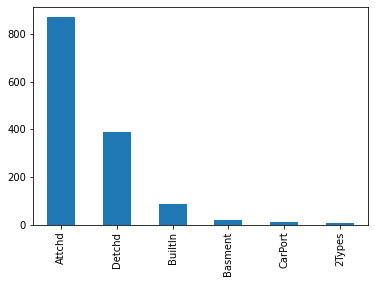

In [ ]:
df['GarageType'].value_counts().plot.bar()

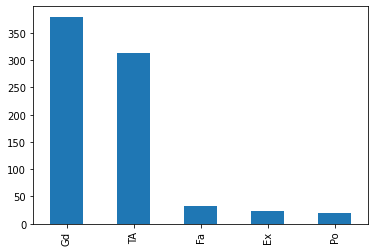

In [ ]:
df['FireplaceQu'].value_counts().plot.bar()

In [ ]:
df['FireplaceQu'].value_counts().index[0]

'Gd'

In [ ]:
def impute_nan(df,variable):
  df[variable] = df[variable].fillna(df[variable].value_counts().index[0])

In [ ]:
impute_nan(df,'GarageType')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df['GarageType'].isnull().sum()

0

In [ ]:
for i in df.columns:
  impute_nan(df,i)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64


#Advantages
1.Easy To implement

2.Fater way to implement 
#### Disadvantages
1.Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's

2.It distorts the relation of the most frequent label

# Adding a variable to capture NAN

In [18]:
df =df1[['BsmtQual','FireplaceQu','GarageType','SalePrice']]
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [19]:
import numpy as np

In [20]:
df['BsmtQual_Var']=np.where(df['BsmtQual'].isnull(),1,0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [23]:
df['BsmtQual'].mode()[0]

'TA'

In [24]:
df['BsmtQual'].fillna(df['BsmtQual'].mode()[0],inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [25]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [27]:
df['FireplaceQu_Var']= np.where(df['FireplaceQu'].isnull(),1,0)
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_Var
0,Gd,NaN,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


In [31]:
df['FireplaceQu'].fillna((df['FireplaceQu'].mode()[0]),inplace=True)
df.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_Var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


# Suppose if you have more frequent categories we just replace NAN with a new category (NAN it self is considered as a new category)





In [48]:
import numpy as np
df =df1[['BsmtQual','FireplaceQu','GarageType','SalePrice']]
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [49]:
def impute_nan(df,variable):
  df[variable+'newvar'] = np.where(df[variable].isnull(),"Missing",df[variable])

In [50]:
for feature in df.columns:
  impute_nan(df,feature)
  df.drop([feature],axis=1,inplace=True)

BsmtQual
FireplaceQu
GarageType
SalePrice


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [47]:
df.head()

,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar,SalePricenewvar
0,Gd,Missing,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


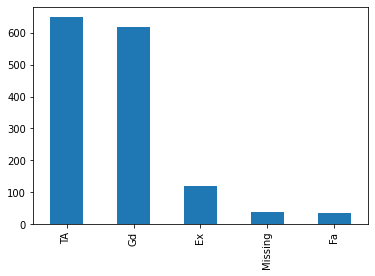

In [56]:
df.BsmtQualnewvar.value_counts().plot.bar()

# One Hot Encoding

In [64]:
df = pd.read_html('https://github.com/prakashveluru/FeatureEngineering/blob/master/train.csv')
df = pd.DataFrame(df[0],columns=['Sex'])
#df=df.iloc[:,1:]
df.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [66]:
pd.get_dummies(df,drop_first=True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [67]:
df1 = pd.read_html('https://github.com/prakashveluru/FeatureEngineering/blob/master/train.csv')

In [69]:
df=pd.DataFrame(df1[0],columns=['Embarked'])
df.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [70]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [71]:
df['Embarked'].dropna(inplace =True)

In [72]:
df.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [74]:
pd.get_dummies(df,drop_first=True).head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [75]:
from google.colab import files
uploaded = files.upload()

import io
import pandas as pd
import numpy as np
df = pd.read_csv(io.BytesIO(uploaded['mercedes.csv']))

Saving mercedes.csv to mercedes.csv


In [76]:
main=df

In [79]:
df = df[['X0','X1','X2','X3','X4','X5','X6']]
df.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


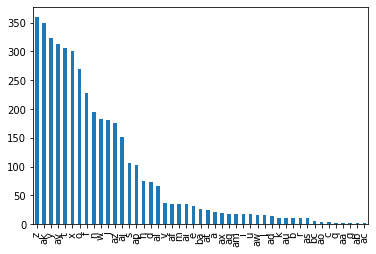

In [83]:
df['X0'].value_counts().plot.bar()

In [84]:
len(df['X0'].value_counts())

47

In [87]:
for i in df.columns:
  print(len(df[i].unique()))

47
27
44
7
4
29
12


In [88]:
df.X1.value_counts().sort_values(ascending=False).head(10)

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
Name: X1, dtype: int64

In [91]:
list_10=list(df.X1.value_counts().head(10).sort_values(ascending=False).index)
list_10


['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [97]:
import numpy as np

for categories in list_10:
  print(categories)
  df[categories] = np.where(df['X1']==categories,1,0)

aa
s
b
l
v
r
i
a
c
o
X1


In [93]:
df.head()

,X0,X1,X2,X3,X4,X5,X6,aa,s,b,l,v,r,i,a,c,o
0,k,v,at,a,d,u,j,0,0,0,0,1,0,0,0,0,0
1,k,t,av,e,d,y,l,0,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,0,0,0,0,0,0,0,0,0,0
3,az,t,n,f,d,x,l,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,0,0,0,0,1,0,0,0,0,0


In [94]:
list_10.append('X1')

In [96]:
df[list_10].head(10)

,aa,s,b,l,v,r,i,a,c,o,X1
0,0,0,0,0,1,0,0,0,0,0,v
1,0,0,0,0,0,0,0,0,0,0,t
2,0,0,0,0,0,0,0,0,0,0,w
3,0,0,0,0,0,0,0,0,0,0,t
4,0,0,0,0,1,0,0,0,0,0,v
5,0,0,1,0,0,0,0,0,0,0,b
6,0,0,0,0,0,1,0,0,0,0,r
7,0,0,0,1,0,0,0,0,0,0,l
8,0,1,0,0,0,0,0,0,0,0,s
9,0,0,1,0,0,0,0,0,0,0,b


In [101]:
main[main['X1']=='b']

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
5,18,92.93,t,b,e,c,d,g,h,s,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9,30,126.99,j,b,aq,c,d,f,a,e,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
12,34,82.62,s,b,ai,c,d,f,g,m,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
23,52,120.77,x,b,m,c,d,j,j,n,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
29,67,128.19,x,b,m,c,d,j,j,n,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4092,8192,100.04,d,b,ak,a,d,o,i,v,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4094,8195,85.09,y,b,z,c,d,o,j,t,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4102,8210,90.13,t,b,ae,c,d,aa,a,a,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4121,8239,91.11,z,b,z,a,d,aa,g,y,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [102]:
main.shape

(4209, 378)

# ORDINAL IDENTIFIER 

Example - Racking system(Happy,Sad,Good)



In [104]:
import datetime as t

In [105]:
todaysdate = t.datetime.today()

In [106]:
todaysdate

datetime.datetime(2020, 8, 22, 9, 44, 26, 511601)

In [109]:
days = [todaysdate-t.timedelta(x) for x in range (0,15)]

In [111]:
df = pd.DataFrame(days)
df.columns=['Day']
df.head()

,Day
0,2020-08-22 09:44:26.511601
1,2020-08-21 09:44:26.511601
2,2020-08-20 09:44:26.511601
3,2020-08-19 09:44:26.511601
4,2020-08-18 09:44:26.511601


In [115]:
df['Day']

0    2020-08-22 09:44:26.511601
1    2020-08-21 09:44:26.511601
2    2020-08-20 09:44:26.511601
3    2020-08-19 09:44:26.511601
4    2020-08-18 09:44:26.511601
5    2020-08-17 09:44:26.511601
6    2020-08-16 09:44:26.511601
7    2020-08-15 09:44:26.511601
8    2020-08-14 09:44:26.511601
9    2020-08-13 09:44:26.511601
10   2020-08-12 09:44:26.511601
11   2020-08-11 09:44:26.511601
12   2020-08-10 09:44:26.511601
13   2020-08-09 09:44:26.511601
14   2020-08-08 09:44:26.511601
Name: Day, dtype: datetime64[ns]

In [121]:
df['Day'].dt.day_name()

0      Saturday
1        Friday
2      Thursday
3     Wednesday
4       Tuesday
5        Monday
6        Sunday
7      Saturday
8        Friday
9      Thursday
10    Wednesday
11      Tuesday
12       Monday
13       Sunday
14     Saturday
Name: Day, dtype: object

In [122]:
df['Day'].dt.month

0     8
1     8
2     8
3     8
4     8
5     8
6     8
7     8
8     8
9     8
10    8
11    8
12    8
13    8
14    8
Name: Day, dtype: int64

In [123]:
df['Day'].dt.year

0     2020
1     2020
2     2020
3     2020
4     2020
5     2020
6     2020
7     2020
8     2020
9     2020
10    2020
11    2020
12    2020
13    2020
14    2020
Name: Day, dtype: int64

In [124]:
df['Day'].dt.hour

0     9
1     9
2     9
3     9
4     9
5     9
6     9
7     9
8     9
9     9
10    9
11    9
12    9
13    9
14    9
Name: Day, dtype: int64

In [125]:
df['Day'].dt.minute

0     44
1     44
2     44
3     44
4     44
5     44
6     44
7     44
8     44
9     44
10    44
11    44
12    44
13    44
14    44
Name: Day, dtype: int64

In [127]:
df['Day'].dt.second

0     26
1     26
2     26
3     26
4     26
5     26
6     26
7     26
8     26
9     26
10    26
11    26
12    26
13    26
14    26
Name: Day, dtype: int64

In [128]:
df

,Day
0,2020-08-22 09:44:26.511601
1,2020-08-21 09:44:26.511601
2,2020-08-20 09:44:26.511601
3,2020-08-19 09:44:26.511601
4,2020-08-18 09:44:26.511601
5,2020-08-17 09:44:26.511601
6,2020-08-16 09:44:26.511601
7,2020-08-15 09:44:26.511601
8,2020-08-14 09:44:26.511601
9,2020-08-13 09:44:26.511601


In [133]:
df['Weekday'] =df['Day'].dt.day_name()
df.head()

,Day,Weekday
0,2020-08-22 09:44:26.511601,Saturday
1,2020-08-21 09:44:26.511601,Friday
2,2020-08-20 09:44:26.511601,Thursday
3,2020-08-19 09:44:26.511601,Wednesday
4,2020-08-18 09:44:26.511601,Tuesday


In [137]:
dictonary = {
    'Monday':1,
    'Tuesday':2,
    'Wednesday':3,
    'Thursday':4,
    'Friday':5,
    'Saturday':6,
    'Sunday':7
}

In [138]:
dictonary

{'Friday': 5,
 'Monday': 1,
 'Saturday': 6,
 'Sunday': 7,
 'Thursday': 4,
 'Tuesday': 2,
 'Wednesday': 3}

In [141]:
df['Rank']=df['Weekday'].map(dictonary)

In [142]:
df.head()

,Day,Weekday,Rank
0,2020-08-22 09:44:26.511601,Saturday,6
1,2020-08-21 09:44:26.511601,Friday,5
2,2020-08-20 09:44:26.511601,Thursday,4
3,2020-08-19 09:44:26.511601,Wednesday,3
4,2020-08-18 09:44:26.511601,Tuesday,2


# Count or Frequency Encoding

In [152]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' , header = None,index_col=None)
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [153]:
columns=[1,3,5,6,7,8,9,13]

In [155]:
train_set=train_set[columns]
train_set.head()

,1,3,5,6,7,8,9,13
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [156]:
train_set.columns=['Employment','Degree','Status','Designation','family_job','Race','Sex','Country']
train_set.head()

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [163]:
for feature in train_set.columns:
  print(feature,":", str(train_set[feature].nunique()),'labels')

Employment : 9 labels
Degree : 16 labels
Status : 7 labels
Designation : 15 labels
family_job : 6 labels
Race : 5 labels
Sex : 2 labels
Country : 42 labels


In [166]:
country_map = train_set['Country'].value_counts().to_dict()
country_map

{' ?': 583,
 ' Cambodia': 19,
 ' Canada': 121,
 ' China': 75,
 ' Columbia': 59,
 ' Cuba': 95,
 ' Dominican-Republic': 70,
 ' Ecuador': 28,
 ' El-Salvador': 106,
 ' England': 90,
 ' France': 29,
 ' Germany': 137,
 ' Greece': 29,
 ' Guatemala': 64,
 ' Haiti': 44,
 ' Holand-Netherlands': 1,
 ' Honduras': 13,
 ' Hong': 20,
 ' Hungary': 13,
 ' India': 100,
 ' Iran': 43,
 ' Ireland': 24,
 ' Italy': 73,
 ' Jamaica': 81,
 ' Japan': 62,
 ' Laos': 18,
 ' Mexico': 643,
 ' Nicaragua': 34,
 ' Outlying-US(Guam-USVI-etc)': 14,
 ' Peru': 31,
 ' Philippines': 198,
 ' Poland': 60,
 ' Portugal': 37,
 ' Puerto-Rico': 114,
 ' Scotland': 12,
 ' South': 80,
 ' Taiwan': 51,
 ' Thailand': 18,
 ' Trinadad&Tobago': 19,
 ' United-States': 29170,
 ' Vietnam': 67,
 ' Yugoslavia': 16}

In [167]:
train_set['Country'] = train_set['Country'].map(country_map)
train_set.head()

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95


# Advantage

1. Easy to use 
2. Not increasing feature space

# Disadvantage
1. It will provide same weight if the frequencies are same

# Target Guided Ordinal Encoding

1. Ordering the labels according to the target

2. Replace the labels by the joint probability of being 1 or 0

In [17]:
import pandas as pd
df = pd.read_html('https://github.com/prakashveluru/FeatureEngineering/blob/master/train.csv')
titan = pd.DataFrame(df[0])
titan=titan.iloc[:,1:]
titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
df = titan[['Survived','Cabin']]
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [19]:
df['Cabin'].fillna('Missing',inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [20]:
df['Cabin']=df['Cabin'].astype(str).str[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [22]:
ordinal_labels=df.groupby(['Cabin'])['Survived'].mean().sort_values().index
ordinal_labels

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [23]:
enumerate(ordinal_labels,0)

In [24]:
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels2

{'A': 2, 'B': 6, 'C': 4, 'D': 8, 'E': 7, 'F': 5, 'G': 3, 'M': 1, 'T': 0}

In [25]:
df['Cabin_ordinal_labels']=df['Cabin'].map(ordinal_labels2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
df.head()

,Survived,Cabin,Cabin_ordinal_labels
0,0,M,1
1,1,C,4
2,1,M,1
3,1,C,4
4,0,M,1


# Mean Encoding 

In [28]:
mean_ordinal=df.groupby(['Cabin'])['Survived'].mean()
mean_ordinal

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [29]:
df['mean_ordinal_ecode']=df['Cabin'].map(mean_ordinal)
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Survived,Cabin,Cabin_ordinal_labels,mean_ordinal_ecode
0,0,M,1,0.299854
1,1,C,4,0.593220
2,1,M,1,0.299854
3,1,C,4,0.593220
4,0,M,1,0.299854



Disadvantage:  Leads to Over fitting

# Probability Ratio Encoding

In [30]:
import pandas as pd

In [31]:
df = titan[['Survived','Cabin']]

In [32]:
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [33]:
df['Cabin'].fillna('Missing',inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [34]:
df.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [38]:
df['Cabin']=df['Cabin'].astype(str).str[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
df['Cabin'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [42]:
prob_df=df.groupby(['Cabin'])['Survived'].mean()

In [43]:
prob_df=pd.DataFrame(prob_df)

In [44]:
prob_df.head()

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000


In [45]:
prob_df['Died']=1-prob_df['Survived']
prob_df

,Survived,Died
Cabin,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000
F,0.615385,0.384615
G,0.500000,0.500000
M,0.299854,0.700146
T,0.000000,1.000000


In [46]:
prob_df['Prob_ratio']=prob_df['Survived']/prob_df['Died']
prob_df

,Survived,Died,Prob_ratio
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000
F,0.615385,0.384615,1.600000
G,0.500000,0.500000,1.000000
M,0.299854,0.700146,0.428274
T,0.000000,1.000000,0.000000


In [49]:
prob_encode=prob_df['Prob_ratio'].to_dict()

In [50]:
df['Cabin_encode']= df['Cabin'].map(prob_encode)
df.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Survived,Cabin,Cabin_encode
0,0,M,0.428274
1,1,C,1.458333
2,1,M,0.428274
3,1,C,1.458333
4,0,M,0.428274
5,0,M,0.428274
6,0,E,3.000000
7,0,M,0.428274
8,1,M,0.428274
9,1,M,0.428274
